In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Preprocessing & model building
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the CSV file
df = pd.read_csv("water quality prediction.csv")

# Show basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# Separate features and target variable
X = df.drop("Potability", axis=1)
y = df["Potability"]


In [4]:
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
# Preprocessing steps (same for all models)
preprocessor = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])


In [6]:
# Pipeline for Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

# Train and evaluate
dt_pipeline.fit(X_train, y_train)
dt_preds = dt_pipeline.predict(X_test)

print("Decision Tree Evaluation:")
print(classification_report(y_test, dt_preds))


Decision Tree Evaluation:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68       400
           1       0.49      0.45      0.47       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656



In [7]:
# Pipeline for SVM
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", SVC(kernel='rbf', random_state=42))
])

# Train and evaluate
svm_pipeline.fit(X_train, y_train)
svm_preds = svm_pipeline.predict(X_test)

print("Support Vector Machine Evaluation:")
print(classification_report(y_test, svm_preds))


Support Vector Machine Evaluation:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       400
           1       0.69      0.27      0.38       256

    accuracy                           0.67       656
   macro avg       0.68      0.60      0.58       656
weighted avg       0.68      0.67      0.62       656



In [8]:
# Pipeline for Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train and evaluate
rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)

print("Random Forest Evaluation:")
print(classification_report(y_test, rf_preds))


Random Forest Evaluation:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       400
           1       0.63      0.30      0.40       256

    accuracy                           0.66       656
   macro avg       0.65      0.59      0.58       656
weighted avg       0.65      0.66      0.62       656



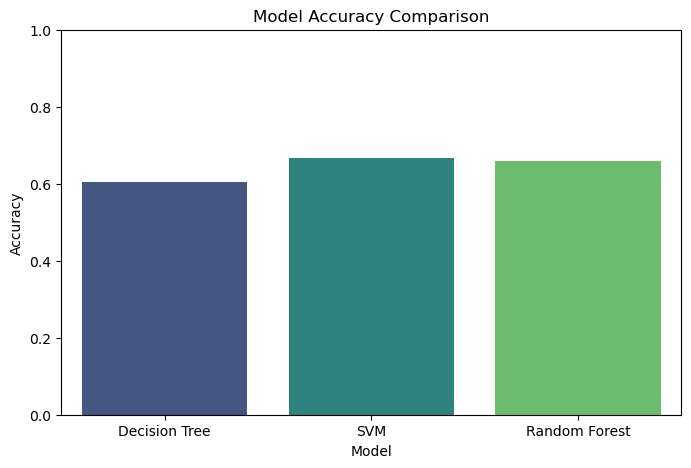

In [10]:
# Fix: Create DataFrame for Seaborn plotting
import pandas as pd

accuracy_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Now plot using Seaborn with hue and legend disabled
plt.figure(figsize=(8, 5))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy', hue='Model', palette='viridis', legend=False)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


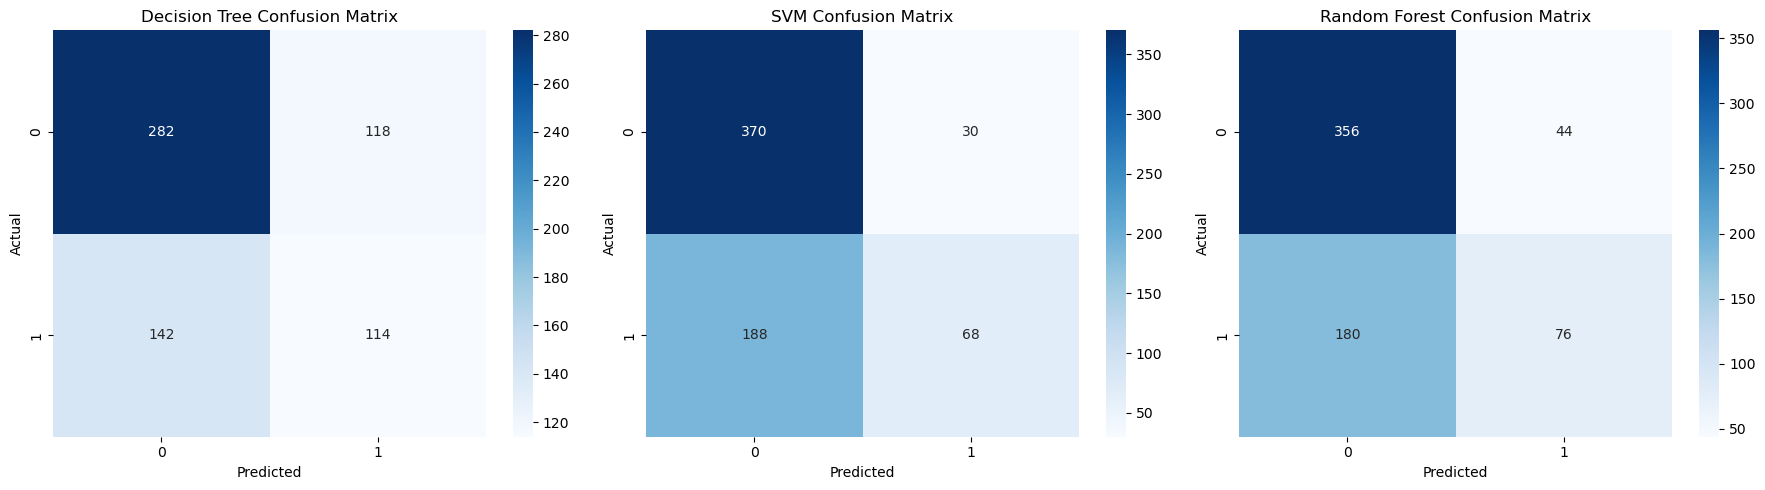

In [11]:
# Confusion matrices for all models
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
predictions = [dt_preds, svm_preds, rf_preds]

for i, preds in enumerate(predictions):
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{model_names[i]} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [12]:
# Perform 5-fold cross-validation for each model
for name, model in zip(model_names, [dt_pipeline, svm_pipeline, rf_pipeline]):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} CV Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


Decision Tree CV Accuracy: 0.5724 (+/- 0.0235)
SVM CV Accuracy: 0.6490 (+/- 0.0259)
Random Forest CV Accuracy: 0.6346 (+/- 0.0309)
